In [1]:
# Step 0: Import required libraries
# -------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Step 1: EDA - head() , describe () , groupby()

In [12]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# 1A: Show head
print("Head of dataset:")
print(df.head())

# 1B: Describe
print("\nDescribe:")
print(df.describe())

# 1C: Groupby target
print("\nGroupby target:")
print(df.groupby('target').mean())

Head of dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Describe:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3

Step 2: Feature scaling

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Step 3: Training the K-NN model on the Training set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Choose K
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsClassifier()

Step 4: Making the Confusion Matrix & Predicting Accuracy Score

In [13]:
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("\nConfusion Matrix:")
print(cm)

print("\nAccuracy Score:", acc)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy Score: 1.0


Step 5: Making Classification Report

In [7]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Step 6: Comparing Error Rate with the K Value

In [8]:
error_rate = []

# Checking error for K = 1 to 40
for i in range(1, 41):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train, y_train)
    pred_i = knn_i.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


Step 7: Plot the error values against K values

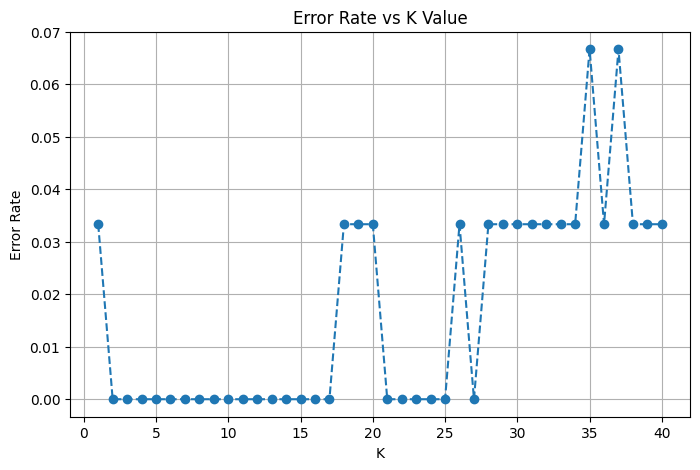

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 41), error_rate, marker='o', linestyle='--')
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.grid()
plt.show()

Step 8: Finding best K

In [10]:
best_k = error_rate.index(min(error_rate)) + 1
print("\nBest K value:", best_k)



Best K value: 2


Step 9: Visualize Test Result of KNN

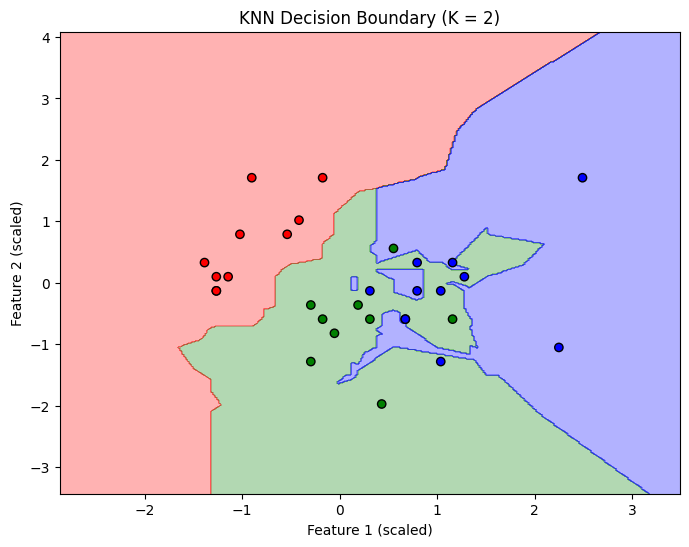

In [11]:
from matplotlib.colors import ListedColormap

X_vis = X_scaled[:, :2]   # take first 2 features only

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42
)

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

# Create meshgrid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red','green','blue']))
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis, cmap=ListedColormap(['red','green','blue']), edgecolor='k')
plt.title(f"KNN Decision Boundary (K = {best_k})")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()